In [65]:
# Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd

#from data_loader_random_missingness import data_loader
from gain import gain
from utils import rmse_loss

In [66]:
#DATA PREPROCESSING FOR 3 hr segments with 5 min sliding window

left_df = pd.read_csv("C:/Users/heena/Desktop/UW/UW_NN_Heena/HU_Done/UW_NN_Heena_improvised_codes/Clinical_Trial/Data/Training_data_GAIN_implementation/baseline_CT_more_than_100_primarykey.csv") 
right_df = pd.read_csv('C:/Users/heena/Desktop/UW/UW_NN_Heena/HU_Done/UW_NN_Heena_improvised_codes/Clinical_Trial/Data/Original_Data/baseline_CT.csv')


In [67]:
#left join to get baseline data for 100%completeness
merged_df = left_df.merge(right_df, on='id&date', how='left', indicator=True)
print(merged_df)
merged_df.to_csv('baseline_100%_complete_data.csv')

                 id&date        Trial  Subject  Visit             DateTime  \
0      102004_2014-02-28  NN1218-3853   102004   1000  2014-02-28 00:03:45   
1      102004_2014-02-28  NN1218-3853   102004   1000  2014-02-28 00:08:45   
2      102004_2014-02-28  NN1218-3853   102004   1000  2014-02-28 00:13:45   
3      102004_2014-02-28  NN1218-3853   102004   1000  2014-02-28 00:18:45   
4      102004_2014-02-28  NN1218-3853   102004   1000  2014-02-28 00:23:45   
...                  ...          ...      ...    ...                  ...   
48091  502024_2014-04-25  NN1218-3853   502024   1000  2014-04-25 23:39:05   
48092  502024_2014-04-25  NN1218-3853   502024   1000  2014-04-25 23:44:05   
48093  502024_2014-04-25  NN1218-3853   502024   1000  2014-04-25 23:49:05   
48094  502024_2014-04-25  NN1218-3853   502024   1000  2014-04-25 23:54:05   
48095  502024_2014-04-25  NN1218-3853   502024   1000  2014-04-25 23:59:05   

           Value    Unit Type      Treatment        date  month

In [68]:
merged_df['DateTime']= pd.to_datetime(merged_df['DateTime'])
merged_df['Value in mg/dl'] = merged_df['Value'].apply(lambda x: x*18)

In [69]:
merged_df.groupby('id&date').apply(lambda x: x.sort_values('DateTime'))


,id&date,Trial,Subject,Visit,DateTime,Value,Unit,Type,Treatment,date,month,_merge,Value in mg/dl
0,102004_2014-02-28,NN1218-3853,102004,1000,2014-02-28 00:03:45,7.713651,mmol/L,CGM,Faster aspart,2014-02-28,2,both,138.845727
1,102004_2014-02-28,NN1218-3853,102004,1000,2014-02-28 00:08:45,7.214206,mmol/L,CGM,Faster aspart,2014-02-28,2,both,129.855716
2,102004_2014-02-28,NN1218-3853,102004,1000,2014-02-28 00:13:45,6.992231,mmol/L,CGM,Faster aspart,2014-02-28,2,both,125.860155
3,102004_2014-02-28,NN1218-3853,102004,1000,2014-02-28 00:18:45,7.325194,mmol/L,CGM,Faster aspart,2014-02-28,2,both,131.853496
4,102004_2014-02-28,NN1218-3853,102004,1000,2014-02-28 00:23:45,7.380688,mmol/L,CGM,Faster aspart,2014-02-28,2,both,132.852386
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48091,502024_2014-04-25,NN1218-3853,502024,1000,2014-04-25 23:39:05,15.538291,mmol/L,CGM,NovoRapid,2014-04-25,4,both,279.689234
48092,502024_2014-04-25,NN1218-3853,502024,1000,2014-04-25 23:44:05,15.538291,mmol/L,CGM,NovoRapid,2014-04-25,4,both,279.689234
48093,502024_2014-04-25,NN1218-3853,502024,1000,2014-04-25 23:49:05,15.538291,mmol/L,CGM,NovoRapid,2014-04-25,4,both,279.689234
48094,502024_2014-04-25,NN1218-3853,502024,1000,2014-04-25 23:54:05,15.538291,mmol/L,CGM,NovoRapid,2014-04-25,4,both,279.689234


In [70]:
# merged_df_training = merged_df.groupby(['id&date'])['Value in mg/dl'].apply(list)
# print(merged_df_training)


In [71]:
merged_df_dict = merged_df_training.to_dict()
#print(merged_df_dict)
print(len(merged_df_dict.keys()))
#print("167 patient days")
pd.DataFrame.from_dict(data=merged_df_dict, orient='index').to_csv('preprocess1_patient_day_mg_dl.csv', header=False)

#start from here

167


In [72]:
#reading in preprocessed data
data_to_analyse = pd.read_csv("preprocess1_patient_day_mg_dl.csv", header=None)
print(data_to_analyse)

                   0           1           2           3           4    \
0    102004_2014-02-28  138.845727  129.855716  125.860155  131.853496   
1    102004_2014-03-01  159.822420  149.833518  159.822420  153.829079   
2    102004_2014-03-04  187.791343  186.792453  190.788013  192.785794   
3    102004_2014-03-07  298.668147  299.667037  308.657048  300.665927   
4    102004_2014-03-08  182.796892  181.798002  180.799112  179.800222   
..                 ...         ...         ...         ...         ...   
162  502021_2014-04-25  233.740289  232.741398  231.742508  229.744728   
163  502021_2014-04-26   77.913430   78.912320   81.908990   85.904550   
164  502024_2014-04-17  248.723640  237.735849  228.745838  226.748058   
165  502024_2014-04-24  236.736959  240.732519  239.733629  264.705882   
166  502024_2014-04-25  233.740289  231.742508  227.746948  223.751387   

            5           6           7           8           9    ...  \
0    132.852386  131.853496  130.854606

In [73]:
training_size = 0.9
training_rows = int( 0.9*len(data_to_analyse))
testing_validation_rows = int((len(data_to_analyse) - training_rows)/2)



# In[5]:


merged_training = data_to_analyse.iloc[:training_rows,:] 
merged_validation = data_to_analyse.iloc[training_rows:training_rows + testing_validation_rows]
merged_test = data_to_analyse.iloc[training_rows + testing_validation_rows:] 


In [74]:
print(merged_training)

                   0           1           2           3           4    \
0    102004_2014-02-28  138.845727  129.855716  125.860155  131.853496   
1    102004_2014-03-01  159.822420  149.833518  159.822420  153.829079   
2    102004_2014-03-04  187.791343  186.792453  190.788013  192.785794   
3    102004_2014-03-07  298.668147  299.667037  308.657048  300.665927   
4    102004_2014-03-08  182.796892  181.798002  180.799112  179.800222   
..                 ...         ...         ...         ...         ...   
145  200003_2014-03-14  126.859046  128.856826  129.855716  130.854606   
146  200003_2014-03-15  187.791343  160.821310  170.810211  166.814650   
147  200003_2014-03-16  172.807991  175.804661  175.804661  177.802442   
148  200003_2014-03-18  166.814650  165.815760  167.813541  167.813541   
149  200005_2014-04-22  121.864595  120.865705  122.863485  120.865705   

            5           6           7           8           9    ...  \
0    132.852386  131.853496  130.854606

In [98]:
import numpy as np
import math
import pandas as pd
from utils import binary_sampler
from random import *


def data_loader_updated(data_x):
# Parameters
    data_x = data_x.reshape(len(data_x),1)
    window_segment = len(data_x)
    no, dim = data_x.shape
    
    no_cont_values_missing = 8 #how many values are missing change from 4 to 8
    data_m =  np.ones((no,dim),int)
    
    last_index_for_start_missing_index = window_segment - no_cont_values_missing
    
    start_index = randint(1, last_index_for_start_missing_index) 
    end_index = start_index + no_cont_values_missing
    
    data_m[start_index:end_index] = 0
    miss_data_x = data_x.copy()
    miss_data_x = miss_data_x.astype('float')
    miss_data_x[start_index:end_index] = np.nan
    
    miss_data_x = np.squeeze(miss_data_x)
    data_m = np.squeeze(data_m)
    data_x = np.squeeze(data_x)
    
    return data_x, miss_data_x, data_m

In [99]:
print(merged_validation.iloc[0:9, 1:13])

             1           2           3           4           5           6   \
150   86.903441   84.905660   82.907880   80.910100   79.911210   78.912320   
151  130.854606  130.854606  130.854606  130.854606  133.851276  136.847947   
152  132.852386  132.852386  132.852386  131.853496  131.853496  130.854606   
153  151.831299  151.831299  150.832408  149.833518  147.835738  146.836848   
154  185.793563  186.792453  185.793563  180.799112  177.802442  175.804661   
155  142.841287  146.836848  147.835738  141.842397  129.855716  118.867925   
156  136.847947  131.853496  127.857936  124.861265  121.864595  119.866815   
157  169.811321  165.815760  162.819090  157.824639  152.830189  149.833518   

             7           8           9           10          11          12  
150   77.913430   77.913430   77.913430   76.914539   75.915649   74.916759  
151  137.846837  137.846837  138.845727  138.845727  138.845727  138.845727  
152  130.854606  129.855716  128.856826  124.861265  1

In [100]:
#from data_loader_updated import data_loader 

In [101]:
train_result_eachdf_data_x_numpy = np.empty([])
train_result_eachdf_miss_data_x_numpy = np.empty([])
train_result_eachdf_data_m_numpy = np.empty([])


# list_data_x_train =  np.empty([])
# list_miss_data_x_train =  np.empty([])
# list_data_m_train =  np.empty([])

window_segment_by_hour = 2
CGM_within_window_segment = int(12*window_segment_by_hour)
last_index_for_range_below = int (288/CGM_within_window_segment)

start = 1
for i in range(0, last_index_for_range_below): #we have total 288 points
    #start = int ((CGM_within_window_segment)*i+1) #change here for how many hours in a row i.e 12 for 1 hour, go upto 24 hours i.e 288 points
    end = int (start + CGM_within_window_segment)
    data_train = merged_training.iloc[0:150, start:end]
    data_train.to_numpy()
    #result = data_loader_updated(data_train)
    if train_result_eachdf_data_x_numpy.size == 1:
        train_result_eachdf_data_x_numpy = data_train
    else:
        train_result_eachdf_data_x_numpy = np.vstack ((train_result_eachdf_data_x_numpy, data_train))    
    start = start + 1
#     if train_result_eachdf_miss_data_x_numpy.size == 1
#         train_result_eachdf_miss_data_x_numpy = result[1]
#     else:
#         train_result_eachdf_miss_data_x_numpy = np.vstack ((train_result_eachdf_miss_data_x_numpy, result[1]))   
        
#     if train_result_eachdf_data_m_numpy.size == 1:
#         train_result_eachdf_data_m_numpy = result[2]
#     else:
#         train_result_eachdf_data_m_numpy = np.vstack ((train_result_eachdf_data_m_numpy, result[2]))   
    

In [102]:
print(train_result_eachdf_data_x_numpy)
pd.DataFrame(train_result_eachdf_data_x_numpy).to_csv('train_inflexion.csv')
#create sliding window aftr this

[[138.84572697 129.85571587 125.86015538 ... 103.8845727  101.88679245
   99.88901221]
 [159.82241953 149.83351831 159.82241953 ... 135.8490566  131.85349611
  130.85460599]
 [187.79134295 186.79245284 190.78801331 ... 173.80688124 169.81132076
  166.81465039]
 ...
 [184.79467258 184.79467258 185.79356271 ... 151.83129856 152.83018868
  154.82796892]
 [183.79578247 189.7891232  192.78579357 ... 186.79245284 187.79134295
  187.79134295]
 [108.87902331 106.88124306 104.88346282 ...  81.90899001  79.91120977
   79.91120977]]


In [103]:
train_result_eachdf_miss_data_x_numpy = np.empty([])
train_result_eachdf_data_m_numpy = np.empty([])


for k in train_result_eachdf_data_x_numpy:
    result = data_loader_updated(k)
    if train_result_eachdf_miss_data_x_numpy.size == 1:
        train_result_eachdf_miss_data_x_numpy = result[1]
    else:
        train_result_eachdf_miss_data_x_numpy = np.vstack ((train_result_eachdf_miss_data_x_numpy, result[1]))   

    if train_result_eachdf_data_m_numpy.size == 1:
        train_result_eachdf_data_m_numpy = result[2]
    else:
        train_result_eachdf_data_m_numpy = np.vstack ((train_result_eachdf_data_m_numpy, result[2]))  
    

In [104]:



#print(train_result_eachdf_miss_data_x_numpy[0:3,:])
pd.DataFrame(train_result_eachdf_miss_data_x_numpy).to_csv('inflexion_miss.csv')


In [105]:
# window_segment_by_hour = 2
# CGM_within_window_segment = int(12*window_segment_by_hour)
# last_index_for_range_below = int (288/CGM_within_window_segment)

# val_result_eachdf_data_x_numpy = np.empty([])
# val_result_eachdf_miss_data_x_numpy = np.empty([])
# val_result_eachdf_data_m_numpy = np.empty([])


# # list_data_x_val =  np.empty([])
# # list_miss_data_x_val =  np.empty([])
# # list_data_m_val =  np.empty([])
# for i in range(0,24):
#     start = 12*i+1
#     end = start + 12
#     data_val = merged_validation.iloc[0:8, start:end]
#     data_val.to_numpy()
#     #result = data_loader_updated(data_val)
#     if val_result_eachdf_data_x_numpy.size == 1:
#         val_result_eachdf_data_x_numpy = data_val
#     else:
#         val_result_eachdf_data_x_numpy = np.vstack ((val_result_eachdf_data_x_numpy, data_val)) 

In [106]:
val_result_eachdf_data_x_numpy = np.empty([])
val_result_eachdf_miss_data_x_numpy = np.empty([])
val_result_eachdf_data_m_numpy = np.empty([])


window_segment_by_hour = 2
CGM_within_window_segment = int(12*window_segment_by_hour)
last_index_for_range_below = int (288/CGM_within_window_segment)

start = 1
for i in range(0, last_index_for_range_below): #we have total 288 points
    #start = int ((CGM_within_window_segment)*i+1) #change here for how many hours in a row i.e 12 for 1 hour, go upto 24 hours i.e 288 points
    end = int (start + CGM_within_window_segment)
    data_val = merged_validation.iloc[0:8, start:end]
    data_val.to_numpy()
    #result = data_loader_updated(data_val)
    if val_result_eachdf_data_x_numpy.size == 1:
        val_result_eachdf_data_x_numpy = data_val
    else:
        val_result_eachdf_data_x_numpy = np.vstack ((val_result_eachdf_data_x_numpy, data_val))    
    start = start + 1

In [107]:
pd.DataFrame(val_result_eachdf_data_x_numpy).to_csv('inflexion_val.csv')

In [108]:
val_result_eachdf_miss_data_x_numpy = np.empty([])
val_result_eachdf_data_m_numpy = np.empty([])


for k in val_result_eachdf_data_x_numpy:
    result = data_loader_updated(k)
    if val_result_eachdf_miss_data_x_numpy.size == 1:
        val_result_eachdf_miss_data_x_numpy = result[1]
    else:
        val_result_eachdf_miss_data_x_numpy = np.vstack ((val_result_eachdf_miss_data_x_numpy, result[1]))   

    if val_result_eachdf_data_m_numpy.size == 1:
        val_result_eachdf_data_m_numpy = result[2]
    else:
        val_result_eachdf_data_m_numpy = np.vstack ((val_result_eachdf_data_m_numpy, result[2]))  

In [109]:
print(val_result_eachdf_miss_data_x_numpy.shape)
pd.DataFrame(val_result_eachdf_miss_data_x_numpy).to_csv('inflexion_val_miss.csv')

(96, 24)


In [110]:
training_sample_size = train_result_eachdf_miss_data_x_numpy.shape[0]
validation_sample_size = val_result_eachdf_miss_data_x_numpy.shape[0]
print(training_sample_size)
print(validation_sample_size)

1800
96


In [112]:
batch_size = 16
iterations_per_epoch = int (training_sample_size/batch_size)
total_epochs = 100
Total_iterations = int (iterations_per_epoch * total_epochs)
print(Total_iterations)
gain_parameters = {'batch_size': 16, 'hint_rate_train': 0.9,'hint_rate_val': 0.5, 'alpha': 10, 'iterations': Total_iterations}

11200


In [113]:
result_GAN = gain(train_result_eachdf_miss_data_x_numpy,val_result_eachdf_miss_data_x_numpy, gain_parameters)
#print(result_GAN[0])


100%|████████████████████████████████████████████████████████████████████████████| 11200/11200 [22:42<00:00,  8.22it/s]


In [114]:
print(rmse_loss(train_result_eachdf_data_x_numpy, result_GAN[0], train_result_eachdf_data_m_numpy))

0.24016674912740293


In [115]:
pd.DataFrame(result_GAN[2]).to_csv('gan_imputed_val_epc40_8_24.csv')

In [116]:
pd.DataFrame(result_GAN[0]).to_csv('gan_imputed_train_epc40_8_24.csv')

In [117]:
train_result_eachdf_miss_data_x_df = pd.DataFrame (train_result_eachdf_miss_data_x_numpy)
train_result_eachdf_miss_data_x_df.to_csv('train_miss_epc40_8_24.csv')
train_result_eachdf_data_x_df = pd.DataFrame (train_result_eachdf_data_x_numpy)
train_result_eachdf_data_x_df.to_csv('train_ori_epc40_8_24.csv')

In [118]:
pd.DataFrame(train_result_eachdf_data_x_numpy).to_csv('original_data_epc40_8_24.csv')

In [119]:
loss_curves = result_GAN[1]
#print(loss_curves)

In [120]:
D_loss_train = loss_curves['D_loss_train'] 
G_loss_train = loss_curves['G_loss_train'] 
G_loss_val = loss_curves['G_loss_val']

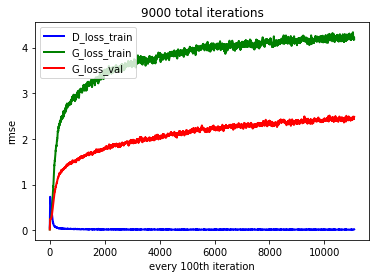

In [121]:
import matplotlib
import matplotlib.pyplot as pp
from scipy.signal import lfilter

n = 15  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a, D_loss_train)
yy1 = lfilter(b,a, G_loss_train)
yy2 = lfilter(b,a,G_loss_val)
pp.plot(yy, linewidth=2, linestyle="-", c="b",label ="D_loss_train")  # smooth by filter
pp.plot(yy1, linewidth=2, linestyle="-", c="g",label ='G_loss_train')
pp.plot(yy2, linewidth=2, linestyle="-", c="r",label ='G_loss_val')
pp.xlabel("every 100th iteration")
pp.ylabel("rmse")
pp.title("9000 total iterations")
pp.legend()
pp.savefig('loss_curve_1hr_it100.png',format='png')

In [122]:
miss_data_x_train_df = pd.DataFrame(train_result_eachdf_miss_data_x_numpy)
linear_imputed = miss_data_x_train_df.interpolate(method='linear', axis=1, limit_direction = 'both')
linear_imputed_array = linear_imputed.to_numpy()

print("linear rmse")
#  print(linear_imputed_array)
linear_rmse = rmse_loss(train_result_eachdf_data_x_numpy, linear_imputed_array, train_result_eachdf_data_m_numpy)
print(linear_rmse)

linear rmse
0.015686247889913515
